In [1]:
### Import Library
import cv2                          # OpenCV untuk membaca dan memproses gambar
import matplotlib.pyplot as plt     # Visualisasi gambar dan histogram
import numpy as np                  # Manipulasi data array

In [2]:
### Membaca gambar
img = cv2.imread('Foto-Citra-Namaku.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Konversi ke RGB untuk ditampilkan

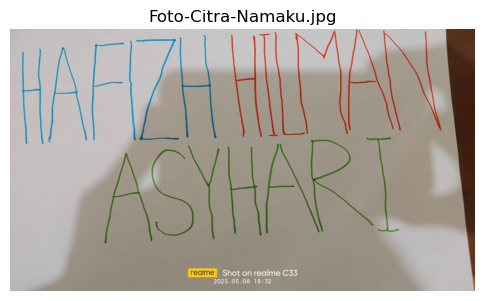

In [5]:
### Menampilkan gambar asli
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Foto-Citra-Namaku.jpg')
plt.axis('off')
plt.show()


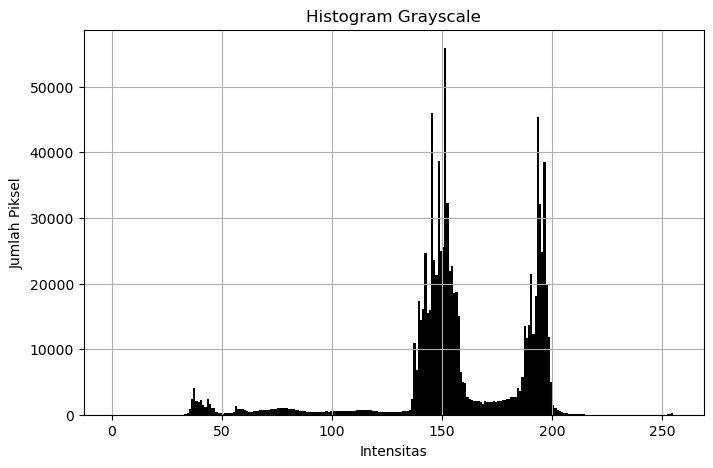

In [6]:
### Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Menampilkan histogram intensitas grayscale
plt.figure(figsize=(8,5))
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.grid(True)
plt.show()

### Menentukan nilai ambang batas (berdasarkan analisis histogram manual)

In [7]:
# Misalnya ditemukan lonjakan atau perbedaan signifikan pada intensitas berikut:
ambang_batas = [50, 100, 150, 200]
ambang_batas.sort()  # Urutkan dari terkecil ke terbesar

In [8]:
### Menampilkan nilai ambang batas
print("Ambang batas dari terkecil hingga terbesar:", ambang_batas)

Ambang batas dari terkecil hingga terbesar: [50, 100, 150, 200]


In [9]:
### Segmentasi berdasarkan ambang batas
segments = []
for i in range(len(ambang_batas)+1):
    if i == 0:
        mask = cv2.inRange(gray, 0, ambang_batas[i])
    elif i == len(ambang_batas):
        mask = cv2.inRange(gray, ambang_batas[i-1]+1, 255)
    else:
        mask = cv2.inRange(gray, ambang_batas[i-1]+1, ambang_batas[i])
    segments.append(mask)

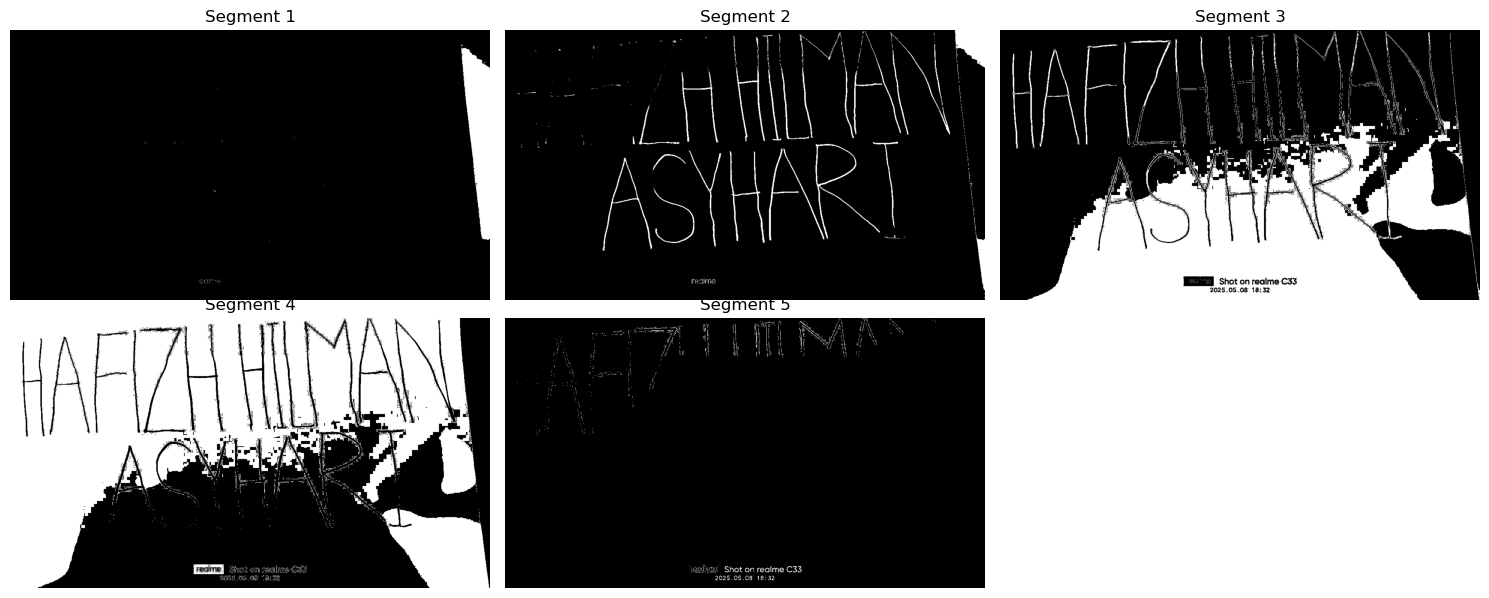

In [10]:
### Tampilkan hasil segmentasi
plt.figure(figsize=(15, 6))
for idx, segment in enumerate(segments):
    plt.subplot(2, 3, idx+1)
    plt.imshow(segment, cmap='gray')
    plt.title(f'Segment {idx+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()